In [24]:
import cPickle, pickle
import IPython, numpy as np, scipy as sp, matplotlib.pyplot as plt, matplotlib, sklearn, librosa
from IPython.display import Audio
from joblib import Parallel, delayed
from joblib.pool import has_shareable_memory
from __future__ import print_function # lets us print without newline to indicate progress
try: # only works on Linux/Mac OS system with this library installed; unavailable for Windows
    import yaafelib as yaafe # Yet Another Audio Feature Extractor
except:
    pass
import os, os.path
import numpy.core.multiarray
import matplotlib.gridspec as gridspec
import matplotlib as mpl
%matplotlib inline
import time
librosa_loader = librosa.load

In [2]:
sound_dir = "Sounds"
sr = 22050

my_sounds = {}

# loads all sound files AND sample rates in the Sounds/ directory into dict of
# audio-sample-rate tuples, with the key being the file's name AND the
# approximate pronunciation of the sound in the file

# >>> print(my_sounds[key])
# [list of numbers representing audio, 1 integer for sample_rate]
for i in os.listdir(sound_dir):
    if ".wav" in i:
        my_sounds[(i[:-4])] = (librosa.load("Sounds/" + i,sr=sr))

In [38]:
# pkl_file = open('Convolutions/ab.pkl', 'rb')

# data1 = pickle.load(pkl_file)
# pprint.pprint(data1)

# data2 = pickle.load(pkl_file)
# pprint.pprint(data2)

# pkl_file.close()

# reader = cPickle.load(open('Convolutions/ahch.pkl', 'rb'))

with open("Convolutions/ab.pkl", 'rb') as in_file:
    ab_convolutions = cPickle.load(in_file)
#     print(cPickle.load(in_file))
# print(ab_convolutions)

In [43]:
with open("my_sounds.pkl", 'rb') as in_file:
    my_sounds = cPickle.load(in_file)

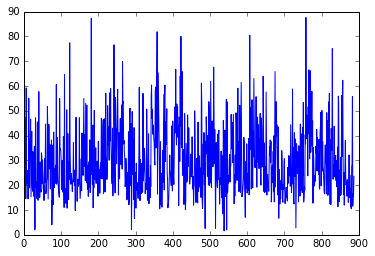

In [55]:
plt.plot([max(np.sqrt(i**2)) for i in ab_convolutions])
# plt.plot(ab_convolutions[830])
# print(my_sounds.keys()[830])
# plt.show()

# print(max((ab_convolutions[9])))
# print(max(np.sqrt(ab_convolutions[9]**2)))

In [124]:
# np.where([max(np.sqrt(i**2)) for i in ab_convolutions] > 10)
# ab_convolutions[830][np.where(ab_convolutions[830] > 21)]

# gets indices of all sounds whose convolution produced a max abs value greater than the threshold,
# which indicates a good amount of similarity
threshold = 80
maxes = [i for i in xrange(len(ab_convolutions)) if (len(np.where(np.abs(ab_convolutions[i]) > threshold)[0]) > 0)]

In [125]:
print(my_sounds.keys().index("ab"))
for i in xrange(len(maxes)):
    print(my_sounds.keys()[i])

830
roh
roi
ouch
awhw
rou
